# Airway Epithelial Differential Gene Expression Workflow

## Abstract

### Lung cancer is one of the leading causes of deaths among men and women, in which, 90% are from smoking cigarettes. Hence, this workflow aims to determine and predict the possibility of cancer using the derived data set consisting of the gene expression consequences of pathway activation. According to Gustafson and others' research, "observed a significant increase in a genomic signature of phosphatidylinositol 3-kinase (PI3K) pathway activation in the cytologically normal bronchial airway of smokers with lung cancer and smokers with dysplastic lesions, suggesting that PI3K is activated in the proximal airway before tumorigenesis." (Reference: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3694402/?report=reader#SD1). Logistic regression produced a 95% AIC to predict if patient will have a lung cancer given the differential gene expression.

## Loading and exploring data

In [30]:
library(GEOquery)

In [31]:
geoD <- getGEO('GSE4115')

Found 1 file(s)
GSE4115_series_matrix.txt.gz
Using locally cached version: /tmp/Rtmpkcy22E/GSE4115_series_matrix.txt.gz
Parsed with column specification:
cols(
  .default = col_double(),
  ID_REF = col_character()
)
See spec(...) for full column specifications.
Using locally cached version of GPL96 found here:
/tmp/Rtmpkcy22E/GPL96.soft 


In [32]:
# get the expression data from geoD
mat <- as.data.frame(exprs (geoD[[1]]))
dim (mat)

[1] 22215   192

In [58]:
mat

,GSM93997,GSM94019,GSM94020,GSM94021,GSM94022,GSM94023,GSM94024,GSM94025,GSM94026,GSM94027,⋯,GSM98798,GSM98799,GSM98800,GSM98801,GSM98871,GSM98872,GSM98873,GSM98874,GSM98875,p
1007_s_at,10.696879,10.560653,9.939516,10.299866,10.467122,10.234799,10.315364,10.016392,9.410771,10.405381,⋯,9.655055,10.072952,10.407795,9.622821,9.774809,8.786862,9.448081,9.159494,9.797606,0.3096851430
1053_at,4.236170,4.173343,4.559698,4.359738,4.245888,4.537967,4.380829,4.271484,4.557144,4.352705,⋯,4.556167,4.356708,4.377660,4.359618,4.300170,4.420151,4.390429,4.500673,4.497449,0.2888571941
117_at,5.345251,5.788414,5.924607,5.583276,5.785865,5.881467,5.944549,5.574131,6.133902,5.727109,⋯,5.856299,5.657181,5.667295,6.150318,5.899963,6.160850,5.724537,6.006388,5.800441,0.3153981051
121_at,7.919187,8.180133,8.207125,8.213886,8.184135,8.022470,8.180496,7.889282,8.147405,8.128021,⋯,8.251081,8.118552,8.110224,8.277467,8.335428,8.806211,8.754450,8.502620,8.229842,0.0009367421
1255_g_at,3.478706,3.745022,3.630689,3.653105,3.718874,3.578695,3.707877,3.534980,3.477739,3.560526,⋯,4.003426,3.887196,3.713854,3.829989,4.127119,3.927962,4.108549,4.203034,4.253573,0.0768068337
1294_at,7.142456,7.667475,7.807055,7.509800,7.588953,7.692626,7.265803,7.220003,7.686817,7.470443,⋯,7.345543,7.696534,7.621459,7.255572,7.794961,6.851934,6.753977,7.412647,7.643311,0.1009910229
1316_at,4.814028,5.254227,5.364942,5.103016,5.233377,4.957821,5.062113,4.972223,5.140898,5.085250,⋯,5.531227,5.335557,5.252291,5.418568,5.430378,5.950592,5.676697,5.689208,5.484969,0.0698161358
1320_at,4.112987,4.303188,4.498574,4.137036,4.029887,4.210757,4.200248,4.106704,4.295180,4.209406,⋯,4.647367,4.484110,4.241374,4.457643,4.280935,4.524067,4.542519,4.625374,4.565450,0.7406251407
1405_i_at,6.948436,5.243215,5.108143,5.450892,4.745138,5.878626,4.901088,6.066332,6.419746,5.856583,⋯,6.843500,6.477846,6.598051,6.838640,6.229742,5.570813,4.625017,6.385283,6.147716,0.0873523944
1431_at,3.270675,3.417931,3.463916,3.526994,3.156802,3.305481,3.378442,3.131761,3.544694,3.318625,⋯,3.409652,3.557800,3.318767,3.495691,3.861018,3.934353,3.400669,3.526722,3.433289,0.0741654448


In [33]:
# dataframe 192 patients, 22215 genes expression
mat[1:5, 1:10]

,GSM93997,GSM94019,GSM94020,GSM94021,GSM94022,GSM94023,GSM94024,GSM94025,GSM94026,GSM94027
1007_s_at,10.696879,10.560653,9.939516,10.299866,10.467122,10.234799,10.315364,10.016392,9.410771,10.405381
1053_at,4.236170,4.173343,4.559698,4.359738,4.245888,4.537967,4.380829,4.271484,4.557144,4.352705
117_at,5.345251,5.788414,5.924607,5.583276,5.785865,5.881467,5.944549,5.574131,6.133902,5.727109
121_at,7.919187,8.180133,8.207125,8.213886,8.184135,8.022470,8.180496,7.889282,8.147405,8.128021
1255_g_at,3.478706,3.745022,3.630689,3.653105,3.718874,3.578695,3.707877,3.534980,3.477739,3.560526


In [34]:
#get phenotype matrix from geoD
p.mat <- pData (geoD[[1]])
dim (p.mat)

[1] 192  50

In [35]:
p.mat[1:5,]

,title,geo_accession,status,submission_date,last_update_date,type,channel_count,source_name_ch1,organism_ch1,characteristics_ch1,⋯,contact_address,contact_city,contact_state,contact_zip/postal_code,contact_country,contact_web_link,supplementary_file,data_row_count,relation,relation.1
GSM93997,Smoker NOT diagnosed with cancer Sample 283,GSM93997,Public on Feb 27 2006,Jan 27 2006,Nov 16 2009,RNA,1,Bronchial Epithelium,Homo sapiens,Sample from smoker NOT diagnosed with cancer,⋯,"715 Albany Street, R304",Boston,MA,02118,USA,http://www.pulmonomics.com,NONE,22215,Alternative to: GSM470879,
GSM94019,Smoker diagnosed with cancer Sample 57,GSM94019,Public on Feb 27 2006,Jan 29 2006,Nov 16 2009,RNA,1,Bronchial Epithelium,Homo sapiens,Sample from smoker diagnosed with cancer,⋯,"715 Albany Street, R304",Boston,MA,02118,USA,http://www.pulmonomics.com,NONE,22215,,
GSM94020,Smoker diagnosed with cancer Sample 62,GSM94020,Public on Feb 27 2006,Jan 29 2006,Nov 16 2009,RNA,1,Bronchial Epithelium,Homo sapiens,Sample from smoker diagnosed with cancer,⋯,"715 Albany Street, R304",Boston,MA,02118,USA,http://www.pulmonomics.com,NONE,22215,,
GSM94021,Smoker diagnosed with cancer Sample 130,GSM94021,Public on Feb 27 2006,Jan 29 2006,Nov 16 2009,RNA,1,Bronchial Epithelium,Homo sapiens,Sample from smoker diagnosed with cancer,⋯,"715 Albany Street, R304",Boston,MA,02118,USA,http://www.pulmonomics.com,NONE,22215,,
GSM94022,Smoker diagnosed with cancer Sample 142,GSM94022,Public on Feb 27 2006,Jan 29 2006,Nov 16 2009,RNA,1,Bronchial Epithelium,Homo sapiens,Sample from smoker diagnosed with cancer,⋯,"715 Albany Street, R304",Boston,MA,02118,USA,http://www.pulmonomics.com,NONE,22215,,


In [36]:
info = read.csv("data1.csv")
rownames(info) <- info$id
info$id <- NULL

In [37]:
info

,status
GSM93997,0
GSM94019,1
GSM94021,1
GSM94022,1
GSM94023,1
GSM94024,1
GSM94025,1
GSM94026,1
GSM94027,1
GSM94029,1


In [38]:
dim(info)

[1] 163   1

#### Split data to two dataframes: patients diagnosed with cancer and not diagnosed with cancer

In [39]:
yes_ind <- which(info$status == 1) # indices of patients with cancer
no_ind <- which(info$status == 0) # indices of patients without cancer
data_yes <- mat[,yes_ind]
data_no <- mat[,no_ind]

In [40]:
data_yes[1:10, 1:10]

,GSM94019,GSM94020,GSM94021,GSM94022,GSM94023,GSM94024,GSM94025,GSM94026,GSM94027,GSM94028
1007_s_at,10.560653,9.939516,10.299866,10.467122,10.234799,10.315364,10.016392,9.410771,10.405381,8.582714
1053_at,4.173343,4.559698,4.359738,4.245888,4.537967,4.380829,4.271484,4.557144,4.352705,4.636058
117_at,5.788414,5.924607,5.583276,5.785865,5.881467,5.944549,5.574131,6.133902,5.727109,6.128866
121_at,8.180133,8.207125,8.213886,8.184135,8.022470,8.180496,7.889282,8.147405,8.128021,8.657792
1255_g_at,3.745022,3.630689,3.653105,3.718874,3.578695,3.707877,3.534980,3.477739,3.560526,4.203074
1294_at,7.667475,7.807055,7.509800,7.588953,7.692626,7.265803,7.220003,7.686817,7.470443,7.224468
1316_at,5.254227,5.364942,5.103016,5.233377,4.957821,5.062113,4.972223,5.140898,5.085250,5.921655
1320_at,4.303188,4.498574,4.137036,4.029887,4.210757,4.200248,4.106704,4.295180,4.209406,4.455706
1405_i_at,5.243215,5.108143,5.450892,4.745138,5.878626,4.901088,6.066332,6.419746,5.856583,5.626579
1431_at,3.417931,3.463916,3.526994,3.156802,3.305481,3.378442,3.131761,3.544694,3.318625,3.453141


In [41]:
dim(data_yes)

[1] 22215    78

In [42]:
data_no[1:10, 1:10]

,GSM93997,GSM94062,GSM94063,GSM94064,GSM94065,GSM94066,GSM94067,GSM94068,GSM94069,GSM94070
1007_s_at,10.696879,8.987167,10.020607,9.537552,10.715248,9.638323,10.452525,9.614805,10.465713,9.290880
1053_at,4.236170,4.552489,4.350220,4.694181,4.310585,4.157543,4.474051,4.451215,4.260984,4.667291
117_at,5.345251,6.180672,5.550266,6.495359,5.402281,5.843543,5.484187,5.572915,5.499798,5.863395
121_at,7.919187,8.621785,8.092362,8.355274,8.169449,8.215881,8.088096,7.971962,7.825645,8.676382
1255_g_at,3.478706,4.196316,3.730360,4.099955,3.567218,3.990172,3.647774,4.591188,3.570795,4.372409
1294_at,7.142456,6.981943,7.511017,7.328565,7.441631,7.207442,7.376030,7.047043,7.413150,7.324041
1316_at,4.814028,5.848459,5.008386,5.801916,5.064319,5.433573,4.971635,5.547281,5.026104,5.948497
1320_at,4.112987,4.685086,4.161312,4.666178,4.019862,4.591523,4.235668,4.323002,4.117285,4.710339
1405_i_at,6.948436,5.521491,6.259273,5.622739,5.230698,5.592184,4.772267,5.779699,5.001040,4.854350
1431_at,3.270675,3.758834,3.253925,3.626832,3.359542,3.494031,3.465579,3.540405,3.320430,3.902260


In [43]:
dim(data_no)

[1] 22215    85

# T-test

### This will be used to identify the differential genes in the dataset. Bonferonni correction is then applied to determine the significant genes using alpha=0.05.

In [44]:
p <-rep (1:22215) ##  a list for p-values
for(i in 1:22215) 
 {
     x <- unlist(data_yes[i,])
     y <- unlist(data_no[i,])
     p[i] = t.test(x, y)$p.value
 }

In [45]:
length(p)

[1] 22215

In [46]:
mat <- cbind(mat, p)
dim(mat)
mat[1:10,]

[1] 22215   193

,GSM93997,GSM94019,GSM94020,GSM94021,GSM94022,GSM94023,GSM94024,GSM94025,GSM94026,GSM94027,⋯,GSM98798,GSM98799,GSM98800,GSM98801,GSM98871,GSM98872,GSM98873,GSM98874,GSM98875,p
1007_s_at,10.696879,10.560653,9.939516,10.299866,10.467122,10.234799,10.315364,10.016392,9.410771,10.405381,⋯,9.655055,10.072952,10.407795,9.622821,9.774809,8.786862,9.448081,9.159494,9.797606,0.3096851430
1053_at,4.236170,4.173343,4.559698,4.359738,4.245888,4.537967,4.380829,4.271484,4.557144,4.352705,⋯,4.556167,4.356708,4.377660,4.359618,4.300170,4.420151,4.390429,4.500673,4.497449,0.2888571941
117_at,5.345251,5.788414,5.924607,5.583276,5.785865,5.881467,5.944549,5.574131,6.133902,5.727109,⋯,5.856299,5.657181,5.667295,6.150318,5.899963,6.160850,5.724537,6.006388,5.800441,0.3153981051
121_at,7.919187,8.180133,8.207125,8.213886,8.184135,8.022470,8.180496,7.889282,8.147405,8.128021,⋯,8.251081,8.118552,8.110224,8.277467,8.335428,8.806211,8.754450,8.502620,8.229842,0.0009367421
1255_g_at,3.478706,3.745022,3.630689,3.653105,3.718874,3.578695,3.707877,3.534980,3.477739,3.560526,⋯,4.003426,3.887196,3.713854,3.829989,4.127119,3.927962,4.108549,4.203034,4.253573,0.0768068337
1294_at,7.142456,7.667475,7.807055,7.509800,7.588953,7.692626,7.265803,7.220003,7.686817,7.470443,⋯,7.345543,7.696534,7.621459,7.255572,7.794961,6.851934,6.753977,7.412647,7.643311,0.1009910229
1316_at,4.814028,5.254227,5.364942,5.103016,5.233377,4.957821,5.062113,4.972223,5.140898,5.085250,⋯,5.531227,5.335557,5.252291,5.418568,5.430378,5.950592,5.676697,5.689208,5.484969,0.0698161358
1320_at,4.112987,4.303188,4.498574,4.137036,4.029887,4.210757,4.200248,4.106704,4.295180,4.209406,⋯,4.647367,4.484110,4.241374,4.457643,4.280935,4.524067,4.542519,4.625374,4.565450,0.7406251407
1405_i_at,6.948436,5.243215,5.108143,5.450892,4.745138,5.878626,4.901088,6.066332,6.419746,5.856583,⋯,6.843500,6.477846,6.598051,6.838640,6.229742,5.570813,4.625017,6.385283,6.147716,0.0873523944
1431_at,3.270675,3.417931,3.463916,3.526994,3.156802,3.305481,3.378442,3.131761,3.544694,3.318625,⋯,3.409652,3.557800,3.318767,3.495691,3.861018,3.934353,3.400669,3.526722,3.433289,0.0741654448


#### Bonferoni correction

In [47]:
significant_genes_0.05 <- mat[mat$p < 0.05/22215,]
dim(significant_genes_0.05)

[1]  27 193

In [48]:
sig_genes = row.names(significant_genes_0.05)
sig_genes

[1] "204400_at"   "204454_at"   "204537_s_at" "207283_at"   "212319_at"  
 [6] "212670_at"   "213212_x_at" "213326_at"   "214373_at"   "214594_x_at"
[11] "214722_at"   "214833_at"   "215359_x_at" "215375_x_at" "215386_at"  
[16] "215659_at"   "215828_at"   "217518_at"   "217818_s_at" "219957_at"  
[21] "220035_at"   "221899_at"   "222280_at"   "222282_at"   "222358_x_at"
[26] "37943_at"    "57739_at"

# Logistic regression with all significant genes

In [49]:
samples = row.names(info)
samples

[1] "GSM93997" "GSM94019" "GSM94021" "GSM94022" "GSM94023" "GSM94024"
  [7] "GSM94025" "GSM94026" "GSM94027" "GSM94029" "GSM94030" "GSM94031"
 [13] "GSM94032" "GSM94033" "GSM94034" "GSM94035" "GSM94036" "GSM94037"
 [19] "GSM94040" "GSM94041" "GSM94043" "GSM94045" "GSM94046" "GSM94047"
 [25] "GSM94048" "GSM94049" "GSM94050" "GSM94051" "GSM94052" "GSM94054"
 [31] "GSM94055" "GSM94056" "GSM94058" "GSM94059" "GSM94061" "GSM94063"
 [37] "GSM94065" "GSM94067" "GSM94069" "GSM94071" "GSM94072" "GSM94073"
 [43] "GSM94074" "GSM94075" "GSM94077" "GSM94078" "GSM94079" "GSM94081"
 [49] "GSM94082" "GSM94083" "GSM94084" "GSM94085" "GSM94086" "GSM94087"
 [55] "GSM94088" "GSM94089" "GSM94091" "GSM94092" "GSM94093" "GSM94094"
 [61] "GSM94095" "GSM94096" "GSM94097" "GSM94098" "GSM94099" "GSM94100"
 [67] "GSM94101" "GSM94102" "GSM94103" "GSM94104" "GSM94105" "GSM94106"
 [73] "GSM94107" "GSM94108" "GSM94109" "GSM94110" "GSM94111" "GSM94114"
 [79] "GSM94115" "GSM94116" "GSM94117" "GSM94118" "GSM94119" "GSM94120"
 [85] "GSM94121" "GSM94122" "GSM94123" "GSM94124" "GSM94125" "GSM94126"
 [91] "GSM94127" "GSM94128" "GSM94129" "GSM94130" "GSM94131" "GSM94132"
 [97] "GSM94134" "GSM94135" "GSM94136" "GSM94137" "GSM94138" "GSM94139"
[103] "GSM94140" "GSM94141" "GSM94142" "GSM94143" "GSM94144" "GSM94145"
[109] "GSM94146" "GSM94147" "GSM94148" "GSM94155" "GSM94157" "GSM94160"
[115] "GSM94161" "GSM94162" "GSM94164" "GSM94165" "GSM94166" "GSM94167"
[121] "GSM94168" "GSM94169" "GSM94170" "GSM94171" "GSM94172" "GSM94174"
[127] "GSM94176" "GSM94177" "GSM98767" "GSM98768" "GSM98769" "GSM98770"
[133] "GSM98771" "GSM98772" "GSM98773" "GSM98774" "GSM98775" "GSM98776"
[139] "GSM98777" "GSM98778" "GSM98779" "GSM98780" "GSM98781" "GSM98782"
[145] "GSM98783" "GSM98784" "GSM98785" "GSM98786" "GSM98787" "GSM98788"
[151] "GSM98789" "GSM98790" "GSM98791" "GSM98792" "GSM98793" "GSM98794"
[157] "GSM98795" "GSM98796" "GSM98797" "GSM98798" "GSM98799" "GSM98800"
[163] "GSM98801"

In [50]:
df = mat[row.names(mat) %in% sig_genes,colnames(mat) %in% samples]
df = as.data.frame(t(df))
df

,204400_at,204454_at,204537_s_at,207283_at,212319_at,212670_at,213212_x_at,213326_at,214373_at,214594_x_at,⋯,217518_at,217818_s_at,219957_at,220035_at,221899_at,222280_at,222282_at,222358_x_at,37943_at,57739_at
GSM93997,5.765691,7.204531,5.347088,4.837257,7.075524,5.550490,5.334198,6.344402,6.591184,6.365349,⋯,5.245428,6.045881,5.857818,5.411525,6.678316,6.091760,6.483532,4.460447,4.335030,6.643784
GSM94019,5.142152,7.013194,5.574452,4.829253,7.437465,5.807297,4.781781,5.741411,6.537048,7.535846,⋯,5.541125,6.078050,6.059236,5.772018,7.028431,6.322353,6.382449,4.936750,4.371426,6.687046
GSM94021,5.187006,6.904288,5.041355,5.114762,6.992103,5.630327,5.386764,5.638102,6.021926,7.358351,⋯,5.149164,6.377234,5.988778,5.203992,7.723653,6.305823,6.235012,4.512032,4.169457,6.552146
GSM94022,4.848287,7.110530,5.273870,4.680424,6.888448,5.862132,4.335281,5.441502,6.181073,6.978390,⋯,5.122607,6.458198,4.818823,5.122794,6.279741,5.955963,6.211365,4.603542,4.338972,5.764418
GSM94023,5.445231,6.723522,5.001648,4.884397,7.670801,6.047966,4.740065,5.553156,6.337904,6.493907,⋯,5.289272,6.326083,5.511775,5.613356,6.300440,5.867550,6.195470,4.448848,4.133314,6.600132
GSM94024,5.011882,7.001058,5.532614,4.973418,7.352243,6.002351,4.459017,5.377827,6.154296,7.086621,⋯,5.802780,6.069005,5.583926,5.220576,6.749019,6.275774,6.091683,4.477053,4.123052,5.996689
GSM94025,4.716019,6.629676,4.733151,4.752061,7.034656,5.600824,4.290589,5.589178,6.091810,6.342726,⋯,4.984570,6.396561,4.921271,5.153961,6.592537,6.056332,5.851117,4.267945,4.052105,6.082478
GSM94026,5.190453,6.740130,5.719967,4.604986,7.044644,5.920299,3.961429,4.945337,6.002944,6.014487,⋯,5.387748,6.818100,4.751296,4.806511,5.417229,6.182178,5.533194,4.121578,4.226407,5.353335
GSM94027,5.131766,6.795717,5.032608,4.807885,6.953820,5.834325,4.326699,5.152781,6.084690,6.241849,⋯,5.126693,6.579038,4.744822,5.033926,6.190061,5.894731,5.831207,4.199608,4.154588,5.809021
GSM94029,4.791057,6.939379,5.405033,4.787396,7.168839,6.195478,4.426063,5.422746,6.049978,6.179423,⋯,5.466695,6.383678,5.330087,5.417023,6.814749,5.988734,6.318126,4.349648,4.404035,6.152311


In [51]:
df_all <- cbind(df, info)
df_all

,204400_at,204454_at,204537_s_at,207283_at,212319_at,212670_at,213212_x_at,213326_at,214373_at,214594_x_at,⋯,217818_s_at,219957_at,220035_at,221899_at,222280_at,222282_at,222358_x_at,37943_at,57739_at,status
GSM93997,5.765691,7.204531,5.347088,4.837257,7.075524,5.550490,5.334198,6.344402,6.591184,6.365349,⋯,6.045881,5.857818,5.411525,6.678316,6.091760,6.483532,4.460447,4.335030,6.643784,0
GSM94019,5.142152,7.013194,5.574452,4.829253,7.437465,5.807297,4.781781,5.741411,6.537048,7.535846,⋯,6.078050,6.059236,5.772018,7.028431,6.322353,6.382449,4.936750,4.371426,6.687046,1
GSM94021,5.187006,6.904288,5.041355,5.114762,6.992103,5.630327,5.386764,5.638102,6.021926,7.358351,⋯,6.377234,5.988778,5.203992,7.723653,6.305823,6.235012,4.512032,4.169457,6.552146,1
GSM94022,4.848287,7.110530,5.273870,4.680424,6.888448,5.862132,4.335281,5.441502,6.181073,6.978390,⋯,6.458198,4.818823,5.122794,6.279741,5.955963,6.211365,4.603542,4.338972,5.764418,1
GSM94023,5.445231,6.723522,5.001648,4.884397,7.670801,6.047966,4.740065,5.553156,6.337904,6.493907,⋯,6.326083,5.511775,5.613356,6.300440,5.867550,6.195470,4.448848,4.133314,6.600132,1
GSM94024,5.011882,7.001058,5.532614,4.973418,7.352243,6.002351,4.459017,5.377827,6.154296,7.086621,⋯,6.069005,5.583926,5.220576,6.749019,6.275774,6.091683,4.477053,4.123052,5.996689,1
GSM94025,4.716019,6.629676,4.733151,4.752061,7.034656,5.600824,4.290589,5.589178,6.091810,6.342726,⋯,6.396561,4.921271,5.153961,6.592537,6.056332,5.851117,4.267945,4.052105,6.082478,1
GSM94026,5.190453,6.740130,5.719967,4.604986,7.044644,5.920299,3.961429,4.945337,6.002944,6.014487,⋯,6.818100,4.751296,4.806511,5.417229,6.182178,5.533194,4.121578,4.226407,5.353335,1
GSM94027,5.131766,6.795717,5.032608,4.807885,6.953820,5.834325,4.326699,5.152781,6.084690,6.241849,⋯,6.579038,4.744822,5.033926,6.190061,5.894731,5.831207,4.199608,4.154588,5.809021,1
GSM94029,4.791057,6.939379,5.405033,4.787396,7.168839,6.195478,4.426063,5.422746,6.049978,6.179423,⋯,6.383678,5.330087,5.417023,6.814749,5.988734,6.318126,4.349648,4.404035,6.152311,1


In [52]:
dim(df_all)

[1] 163  28

## Compare status of patients using the significant genes.

### The boxplots show that given the significant genes, there are still overlap in identifying patients with and with no lung cancer. This could be one of the reasons why more in-depth research is needed on cancer detection and treatments. However, we can see from the graphs that patients with cancer have normally distributed kinase activity, which are consistent all throughout and their numbers are almost in the same range.

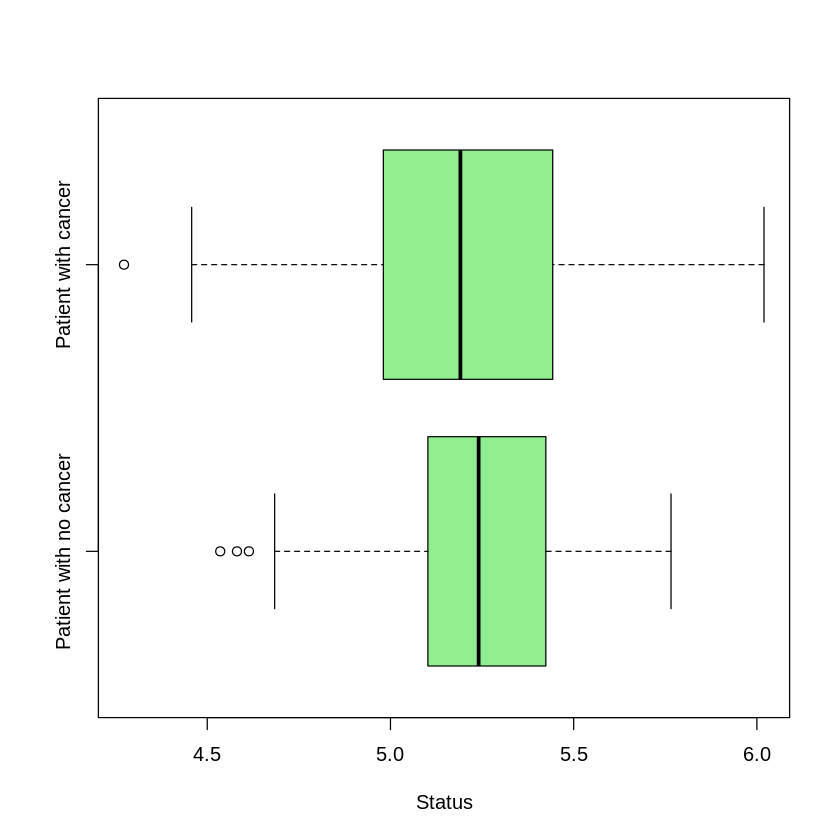

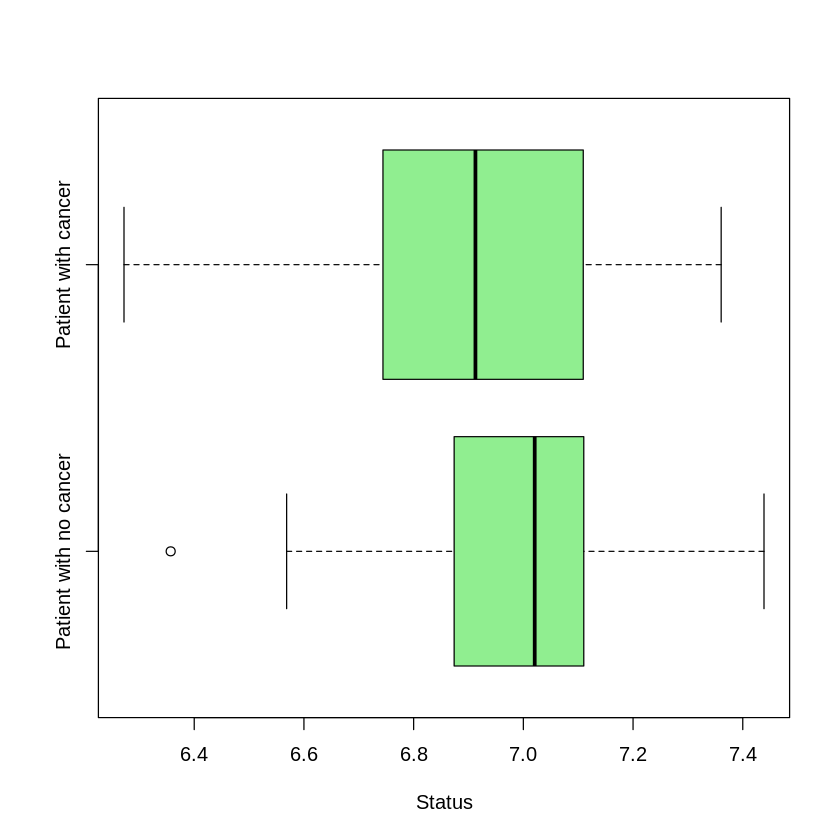

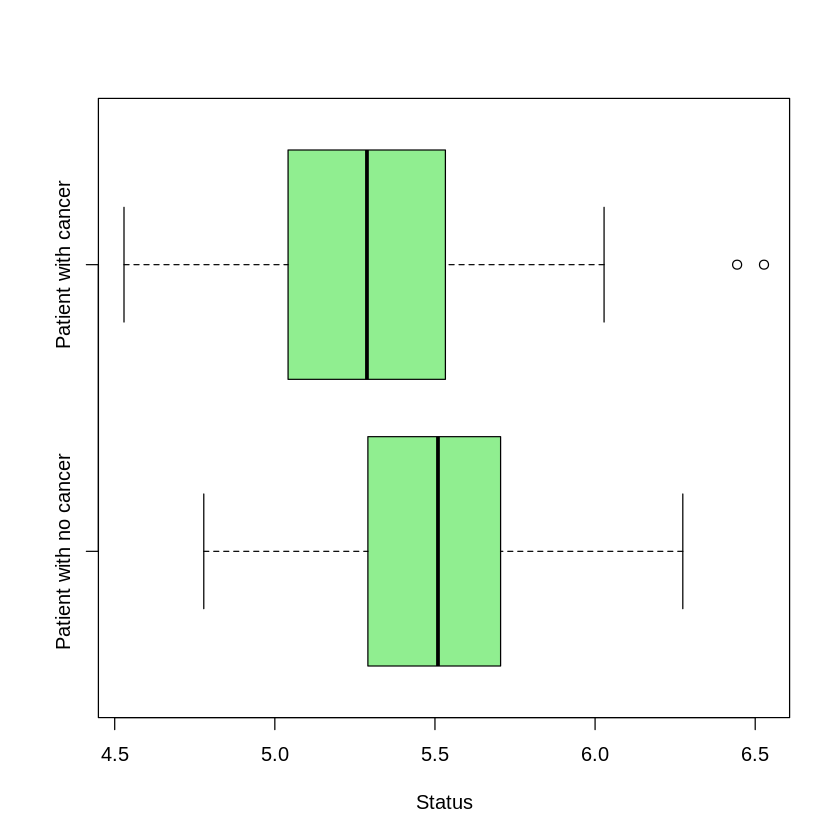

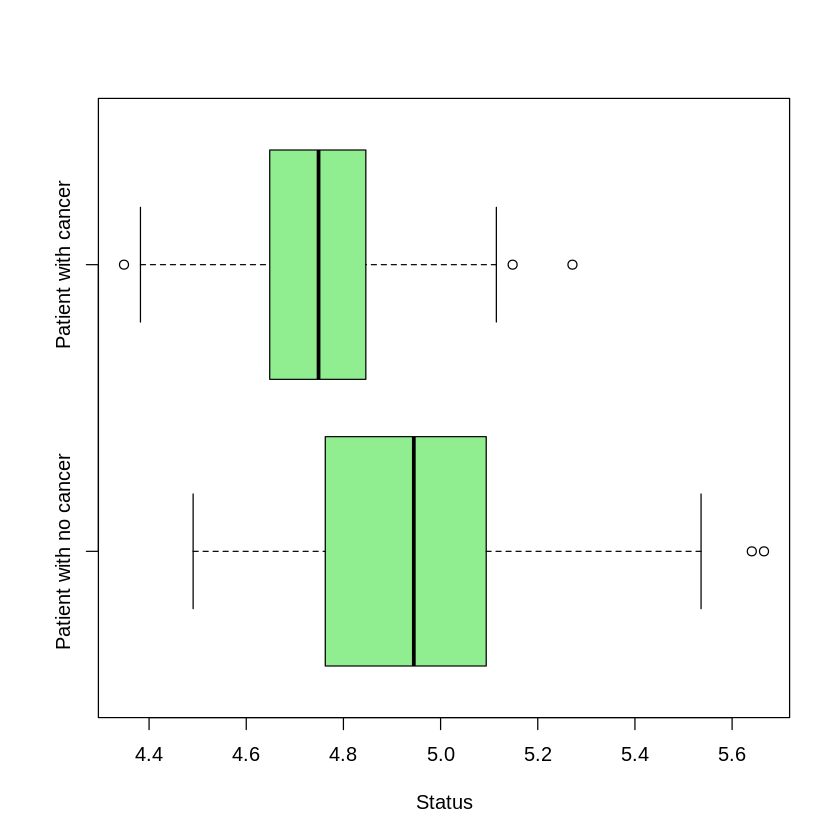

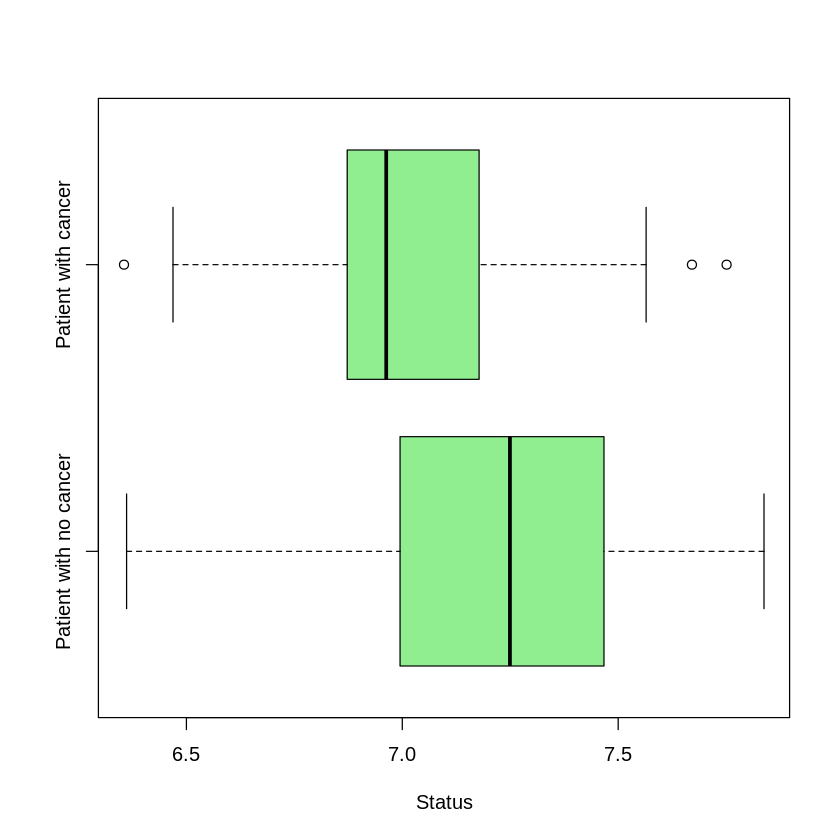

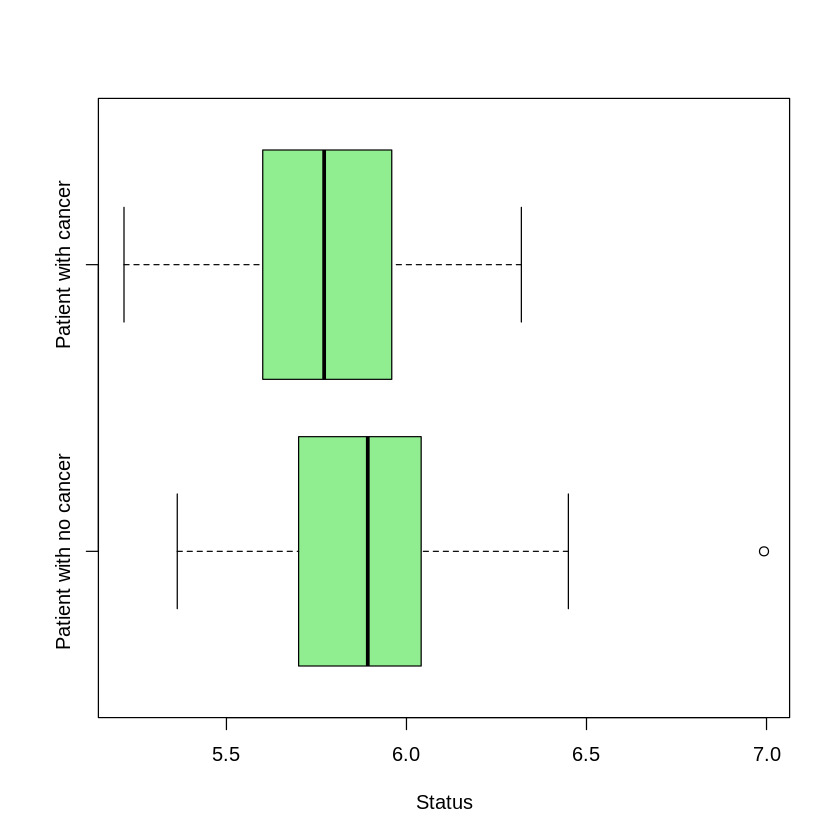

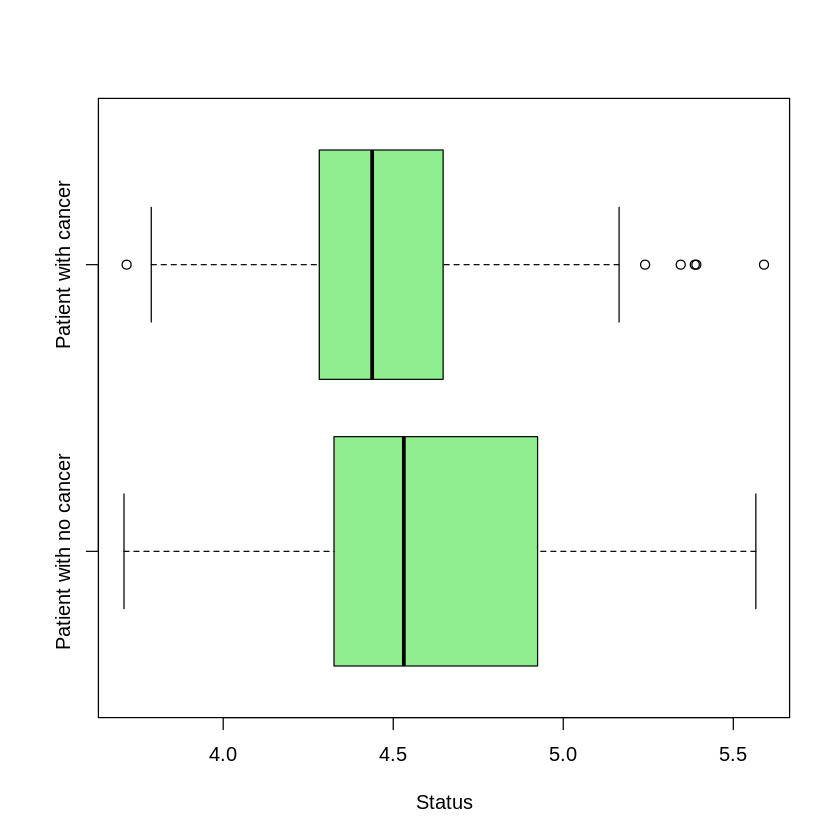

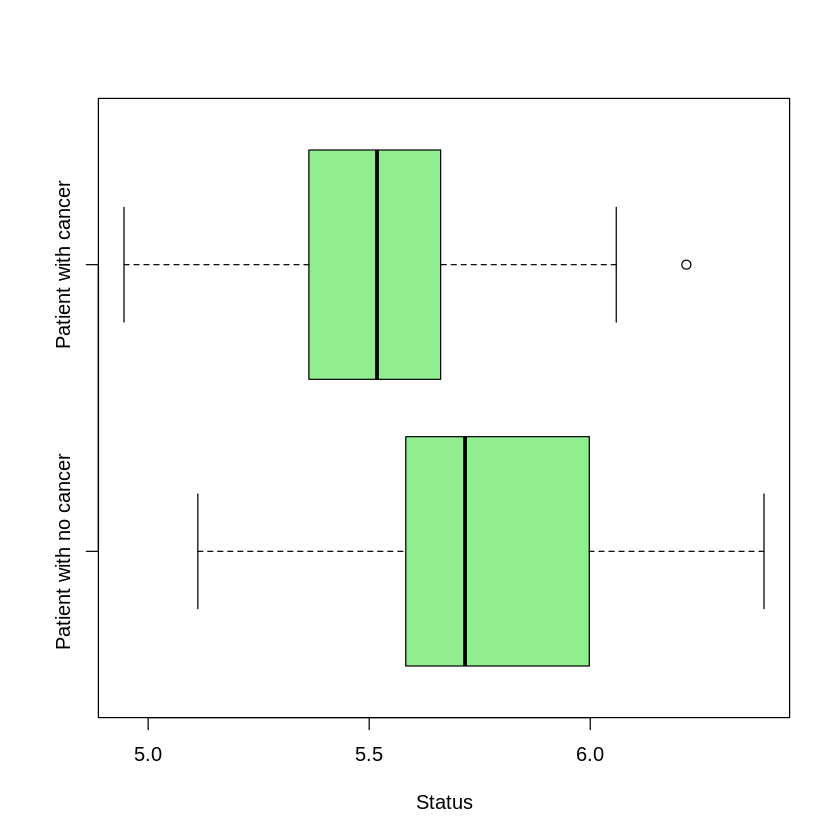

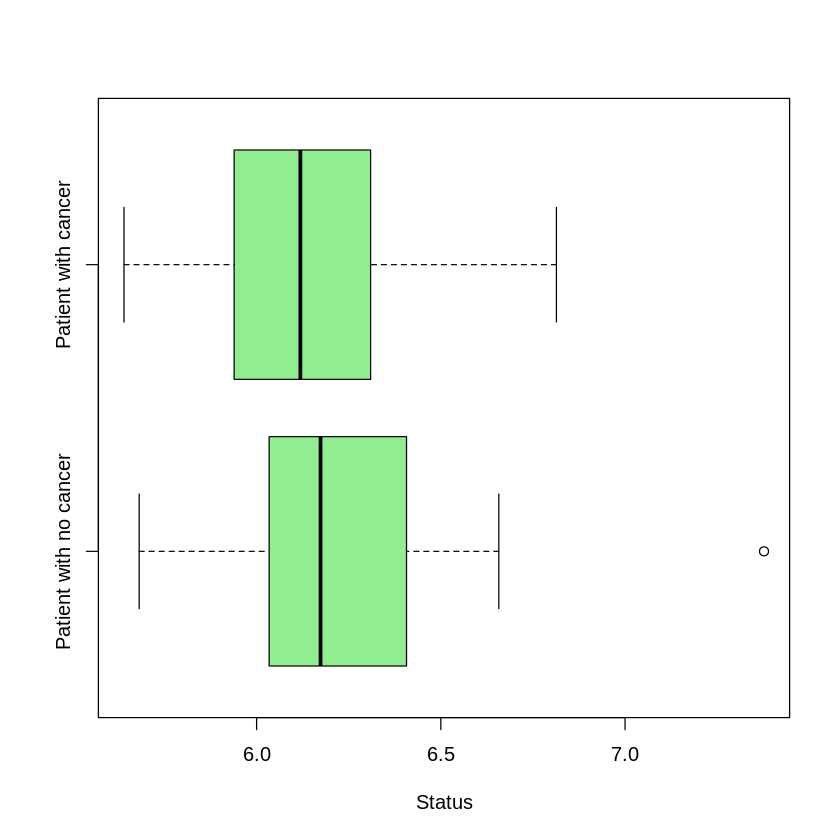

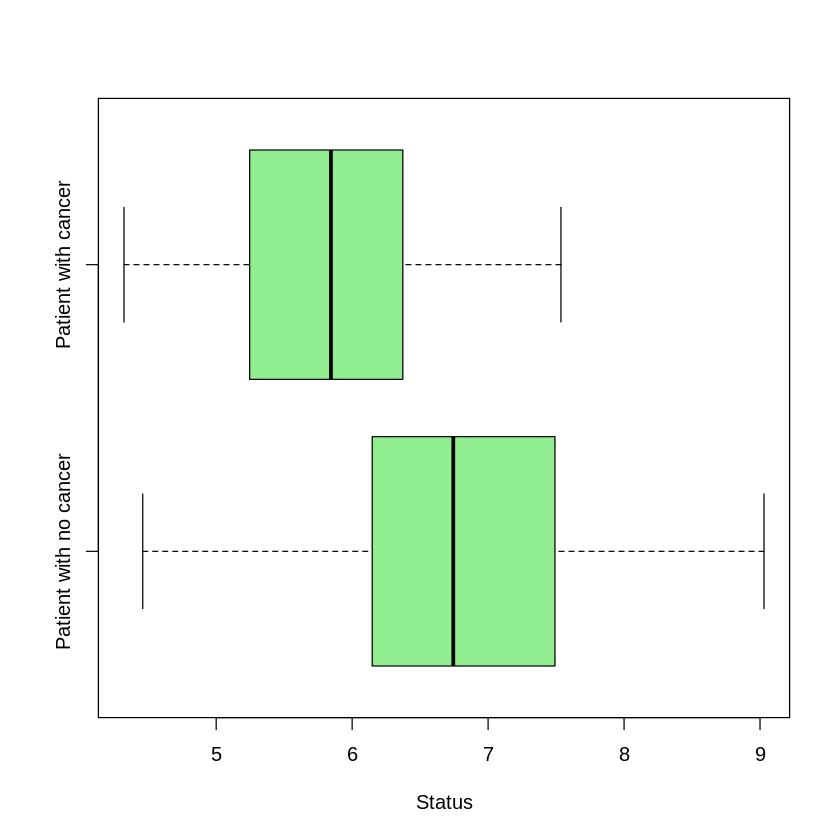

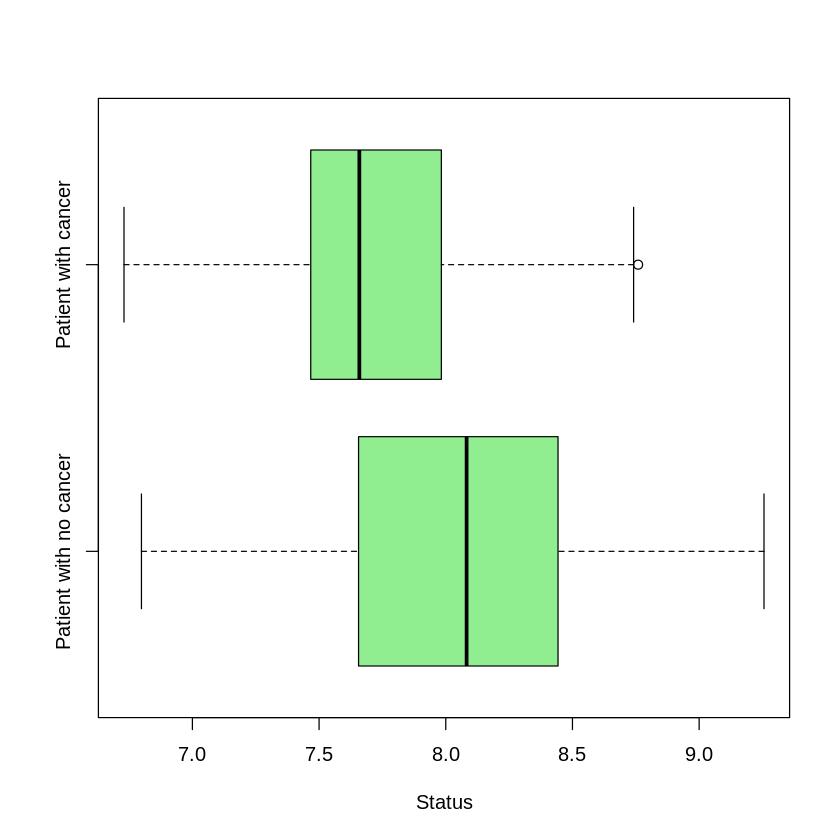

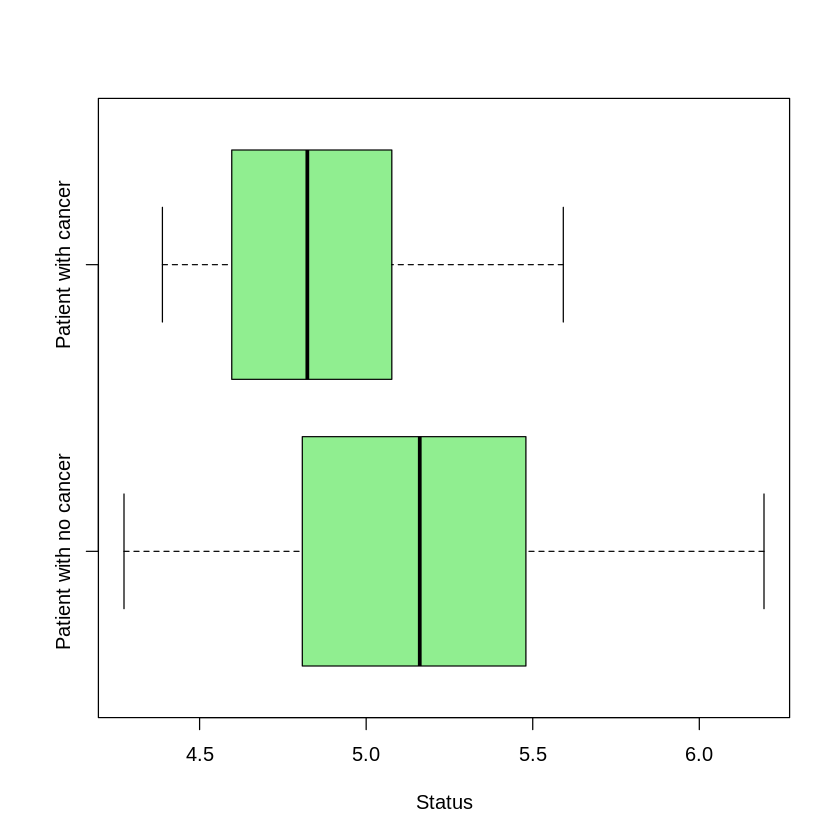

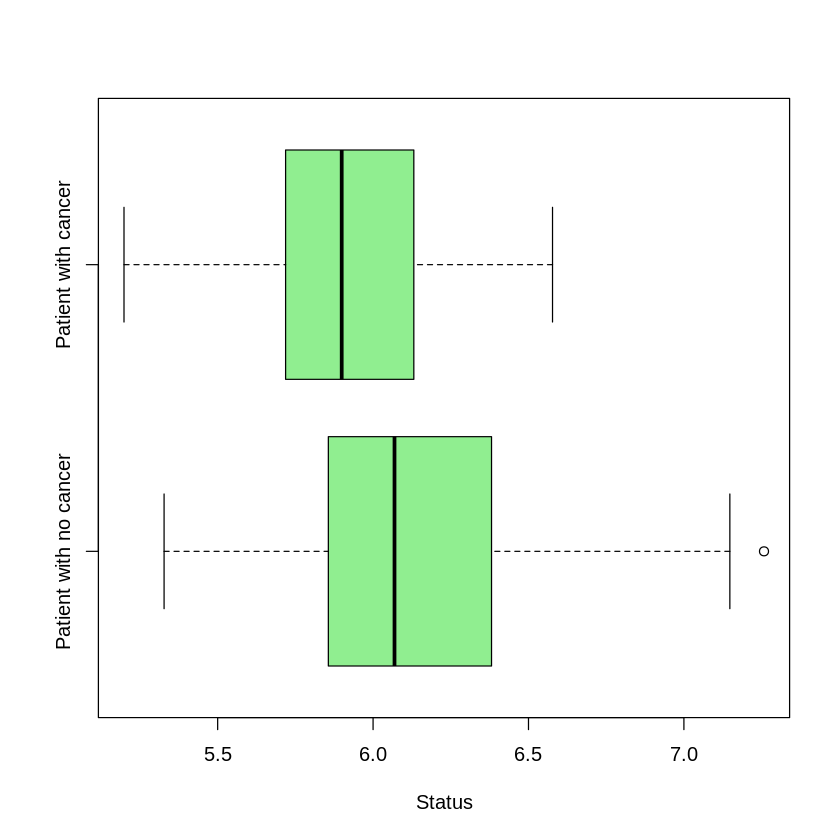

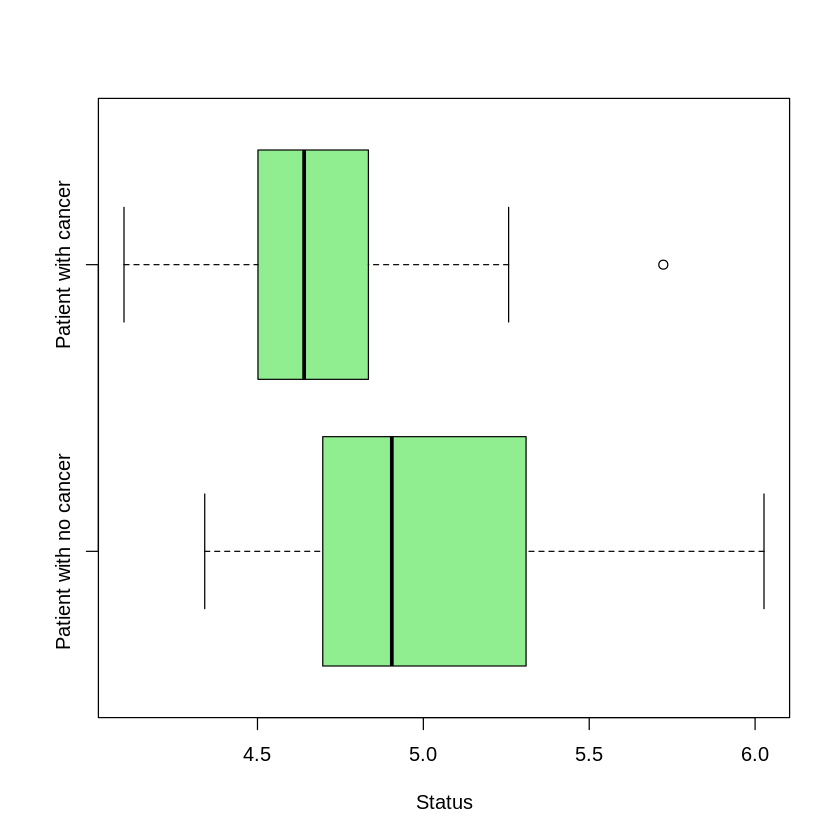

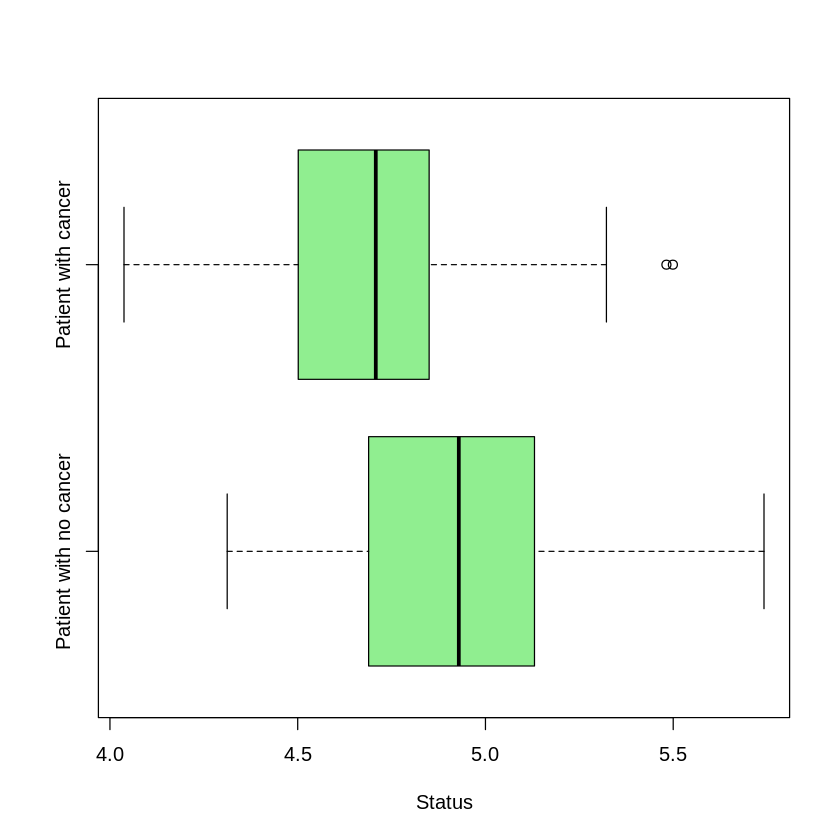

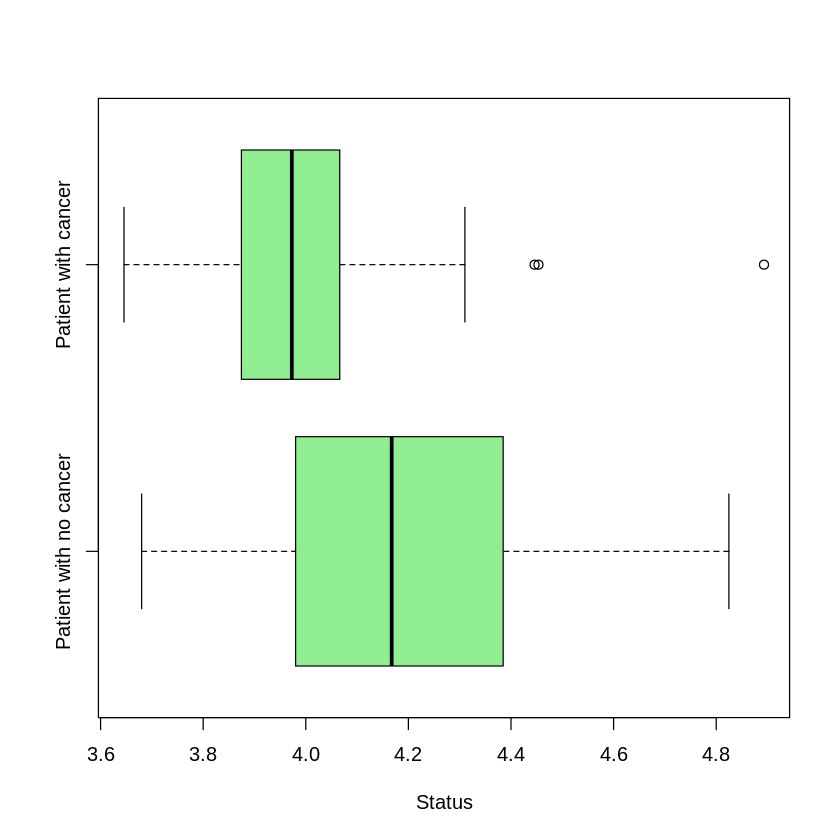

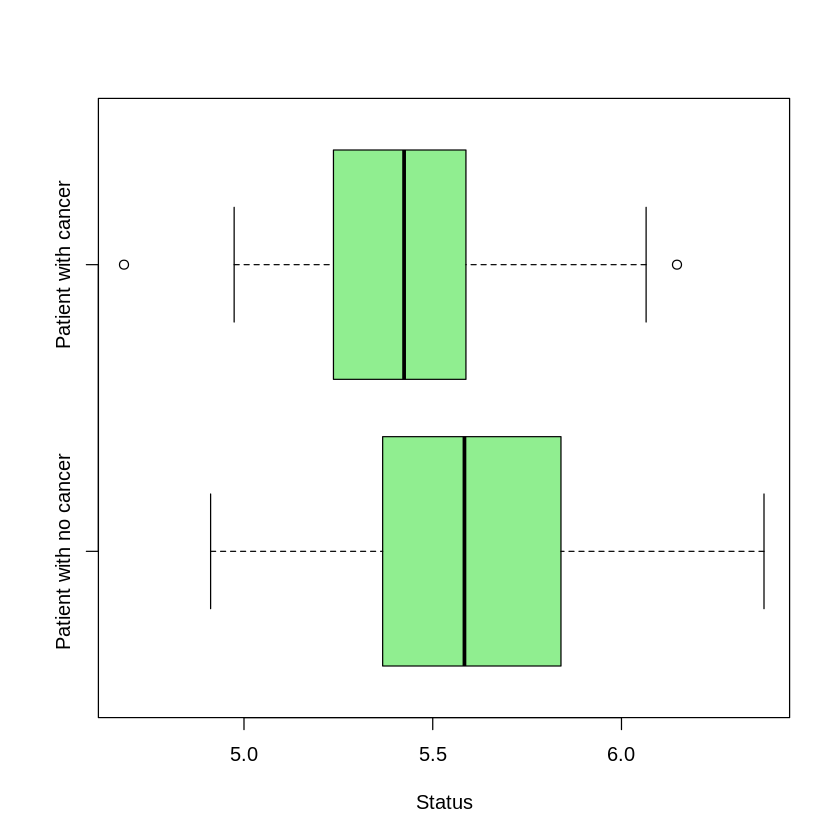

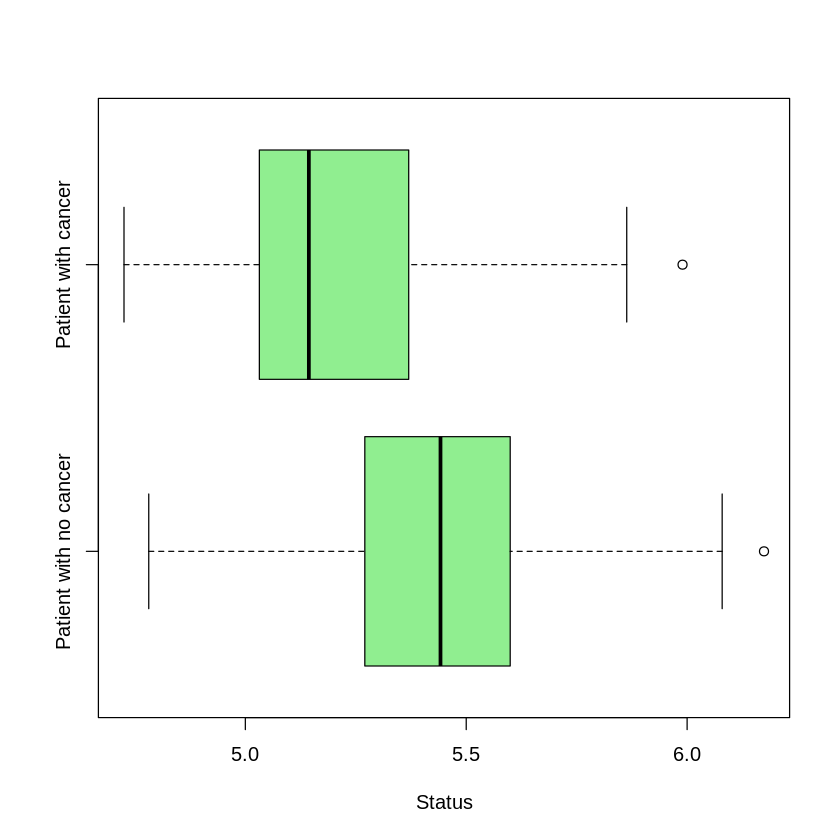

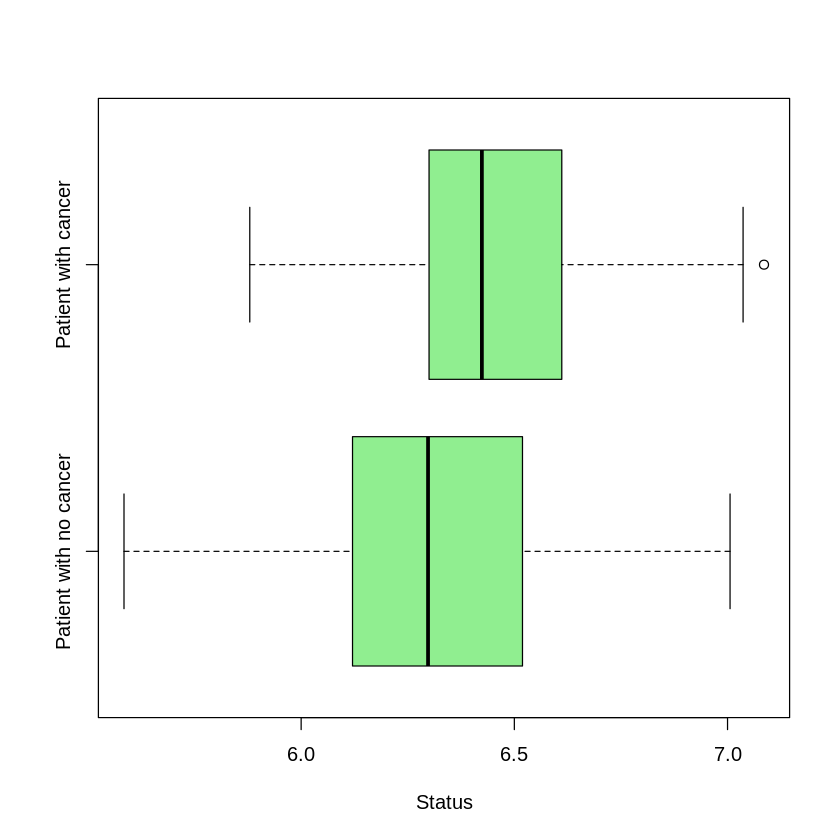

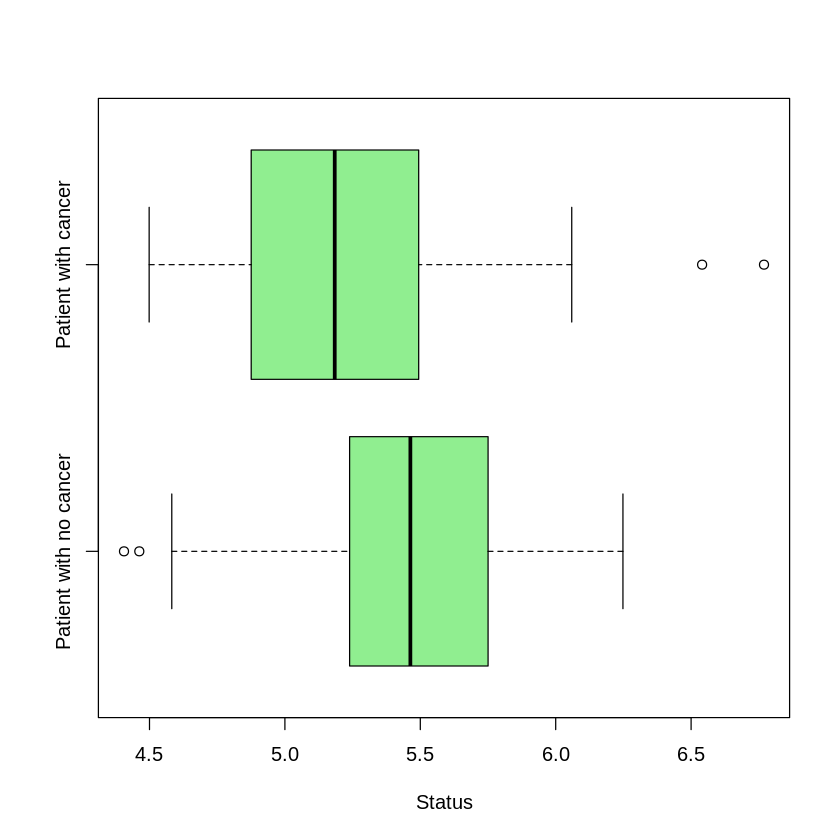

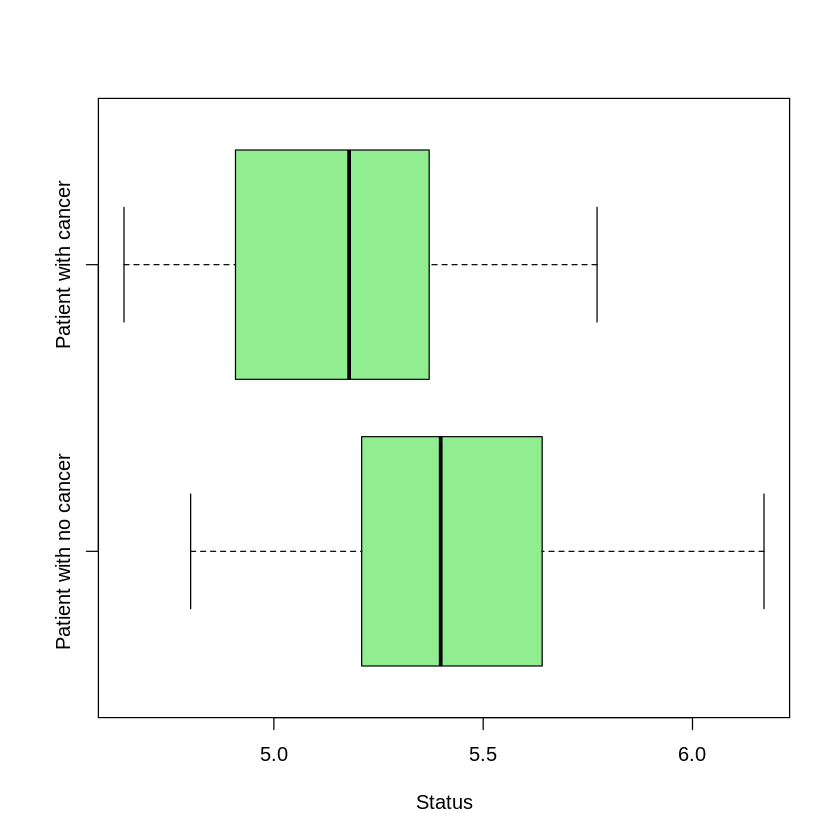

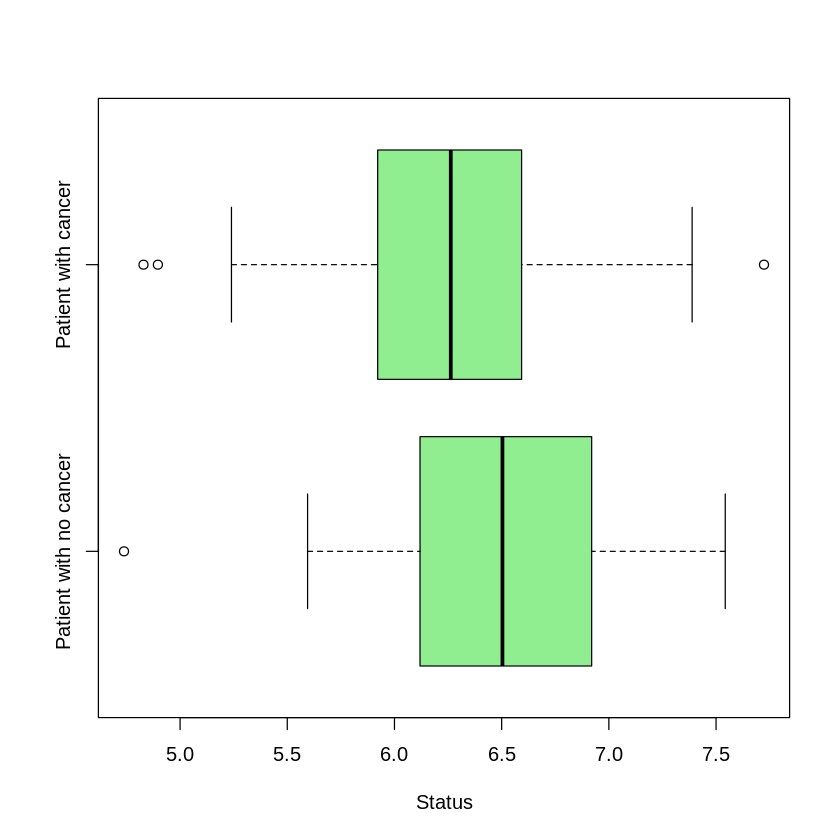

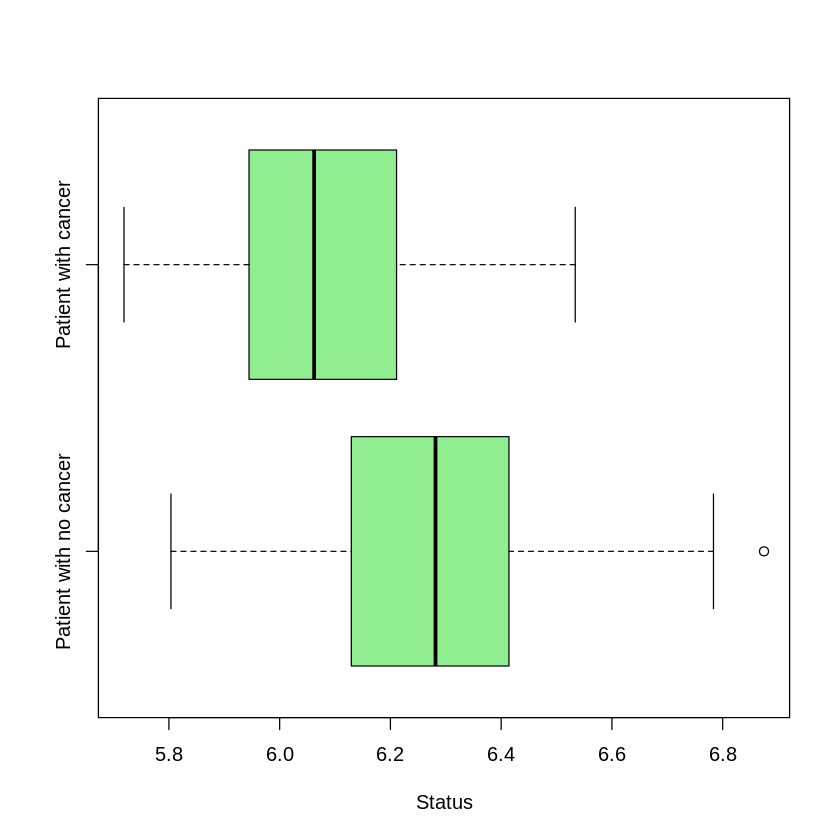

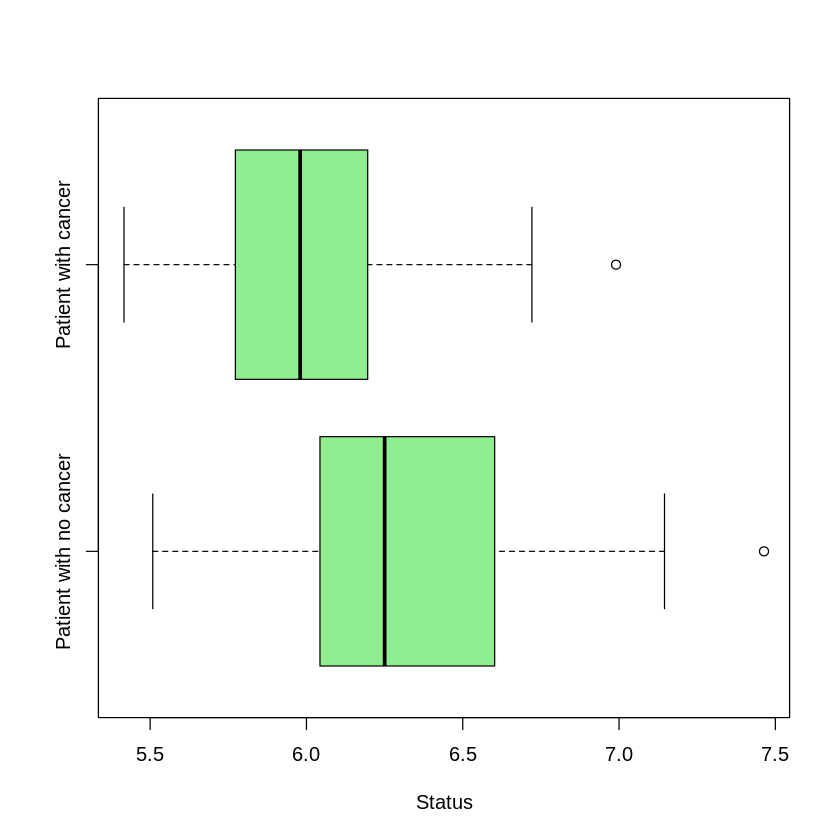

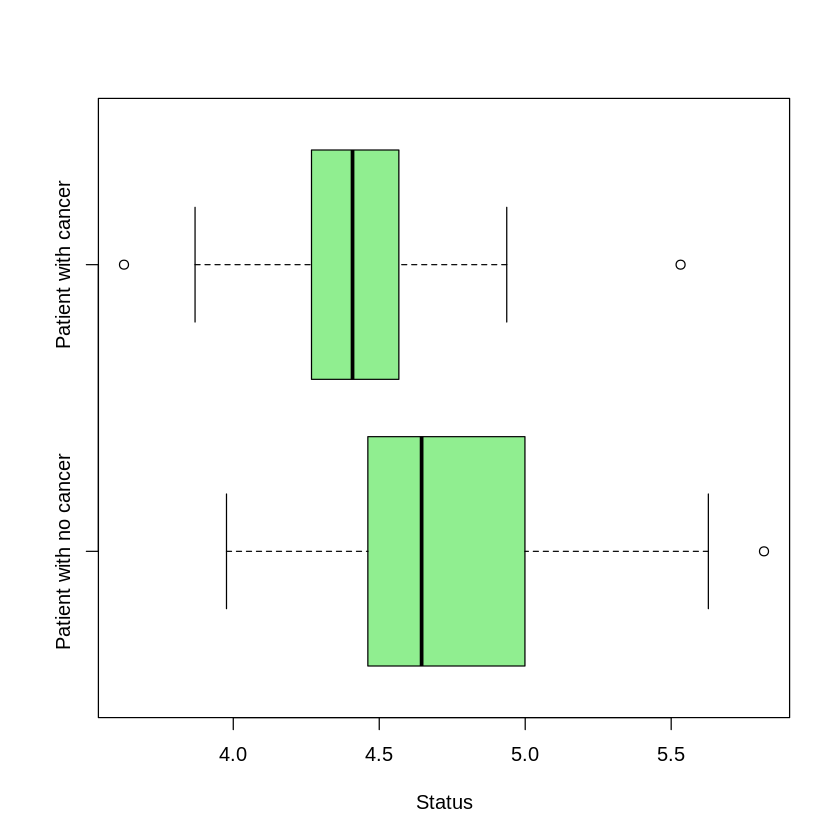

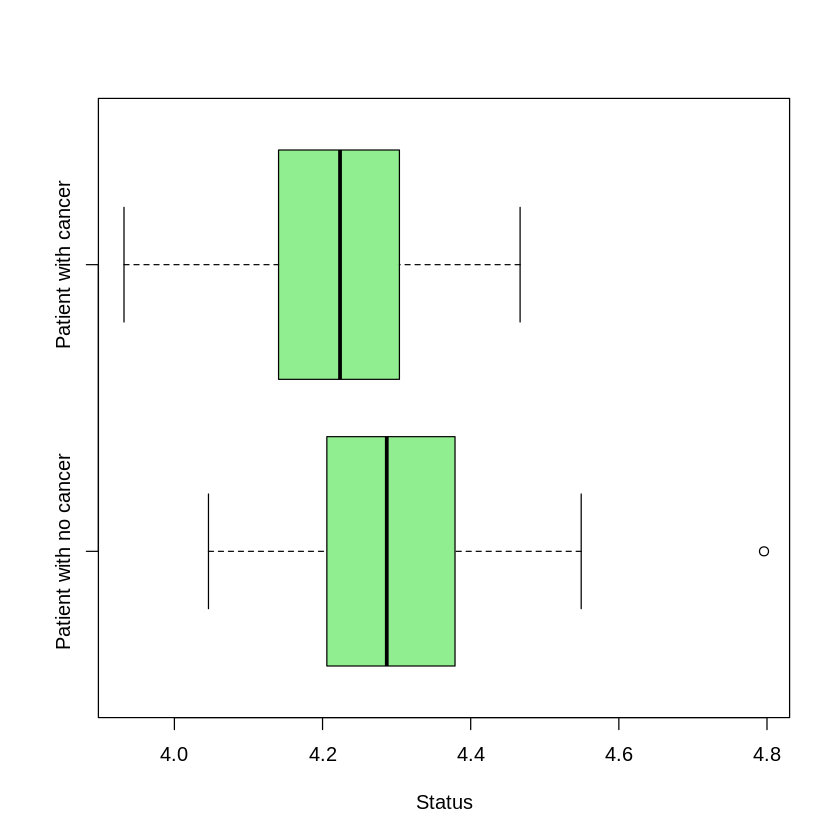

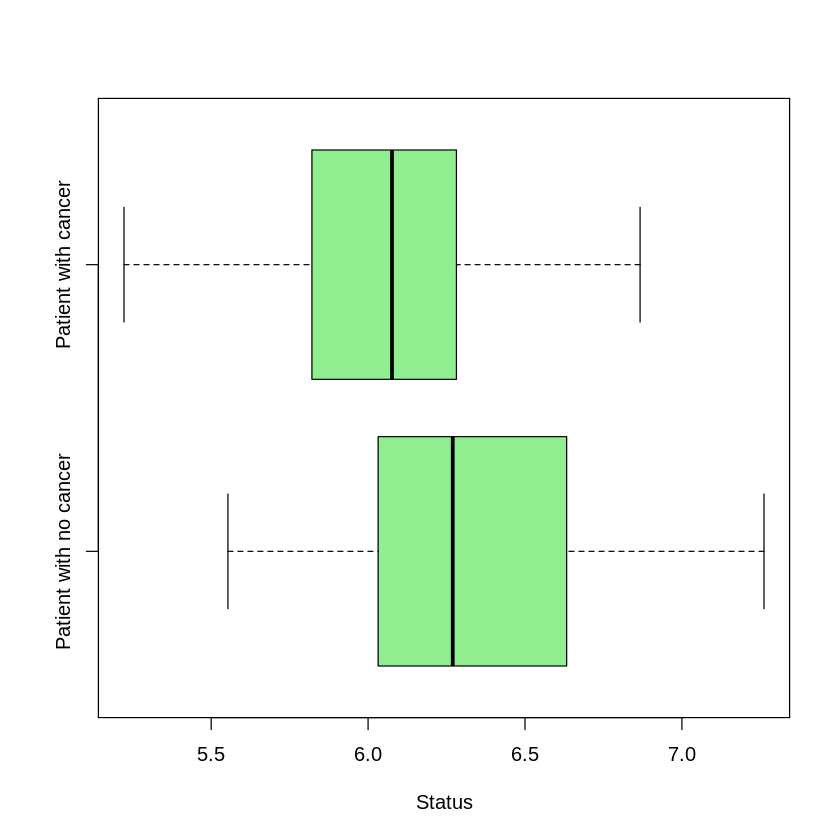

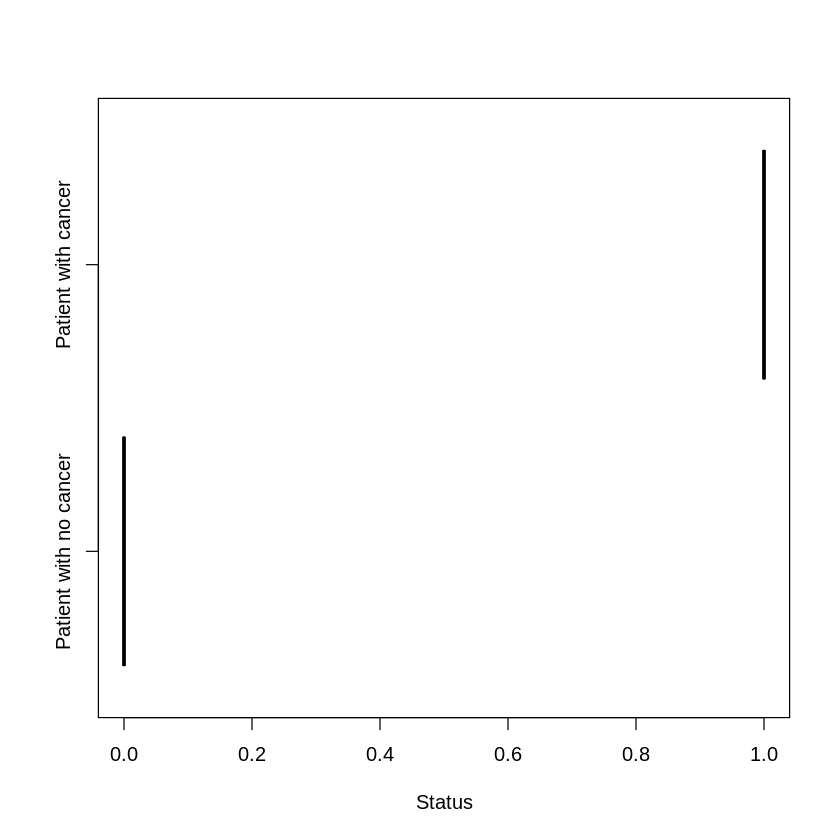

In [67]:
for (i in 1:ncol(df_all)){
boxplot( df_all[,i]~df_all$status ,
         col="lightgreen",  horizontal=T,xlab="Status",
         names = c("Patient with no cancer","Patient with cancer"))
}

### Using the model to predict lung cancer patients, almost half of the significant genes were utilized to come up with a good model.

In [53]:
errors.all <- integer(30)
AIC.all <- double(30)
for (j in 1:3){ # repeat 3 times
    #Randomly shuffle the data
    df_all <- df_all[sample(nrow(df_all)),]

    #Create 10 equally size folds
    folds <- cut(seq(1,nrow(df_all)), breaks = 10, labels = FALSE)

    #Perform 10 fold cross validation
    for(i in 1:10){
        #Segement your data by fold using the which() function 
        testIndexes <- which(folds == i,arr.ind = TRUE)
        testData <- df_all[testIndexes, ]
        trainData <- df_all[-testIndexes, ]
    
        base.mod <- glm(df_all[-testIndexes, 28] ~ 1 , data = trainData[, 1:27], family = "binomial")  # base intercept only model
        all.mod <- glm(df_all[-testIndexes, 28] ~ . , data = trainData[, 1:27], family = "binomial") # full model with all predictors
        glmFit <- step(base.mod, scope = list(lower = base.mod, upper = all.mod), direction = "forward", trace = 0)
            
        AIC.all[j * i] <- AIC(glmFit)
        pred <- predict(glmFit, newdata = testData, type="response")
        errors <- sum(round(pred) != df_all[testIndexes,28])
        errors.all[j * i] <- errors
        
    }
}
    
AIC.mean <- mean(AIC.all)
errors.mean <- round(mean(errors.all))

In [54]:
summary(glmFit)


Call:
glm(formula = df_all[-testIndexes, 28] ~ `222280_at` + `213326_at` + 
    `214373_at` + `222358_x_at` + `215828_at` + `204400_at` + 
    `57739_at` + `204537_s_at` + `213212_x_at`, family = "binomial", 
    data = trainData[, 1:27])

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.51197  -0.62022   0.05836   0.70297   2.42098  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)    37.5107     8.7451   4.289 1.79e-05 ***
`222280_at`    -5.1552     1.4368  -3.588 0.000333 ***
`213326_at`    -4.5863     1.4427  -3.179 0.001478 ** 
`214373_at`     2.7841     1.2234   2.276 0.022866 *  
`222358_x_at`  -2.2349     1.1087  -2.016 0.043813 *  
`215828_at`     3.1908     1.2413   2.570 0.010156 *  
`204400_at`     1.6356     0.8165   2.003 0.045155 *  
`57739_at`     -1.6727     0.8108  -2.063 0.039104 *  
`204537_s_at`  -1.3883     0.7379  -1.881 0.059915 .  
`213212_x_at`   1.0882     0.7744   1.405 0.159955    
---
Signif. code

In [55]:
errors.mean

[1] 3

In [56]:
AIC.mean

[1] 95.85848

In [57]:
library("car")
vif(glmFit)

ERROR: Error in library("car"): there is no package called ‘car’


In [ ]:
errors.all

# Correlation of significant genes

### The presence of collinearity can pose problems in the regression context, since it can be difficult to separate out the individual effects of collinear variables on the response. Selected genes are correlated in the range from -0.54 to 0.8.


In [ ]:
all.correlations <- cor(t(mat[row.names(mat) %in% sig_genes,colnames(mat) %in% samples]), use="everything", method="pearson") 

In [ ]:
all.correlations

In [ ]:
dim(all.correlations)

In [ ]:
library(corrgram)
corrgram(t(mat[row.names(mat) %in% sig_genes, colnames(mat) %in% samples]), order=NULL, lower.panel=panel.shade,
  upper.panel=NULL, text.panel=panel.txt,
  main="Correlations")

In [ ]:
list.correlations <- list()
for (i in 1:ncol(all.correlations) - 1) {
    list.correlations <- c(list.correlations, all.correlations[(i+1):nrow(all.correlations), i])
}

In [ ]:
length(list.correlations)

In [ ]:
correlations.sorted = sort(as.vector(unlist(list.correlations)))

In [ ]:
correlations.sorted

# Clustering

### The heatmap, although with minimal overlap, shows a distinction of the three groups within the airway epithelial activity.

In [ ]:
heatmap(as.matrix(t(df_all[,1:27])))

In [ ]:
d <- dist(df_all[,1:27], method="euclidean")
ret.hclust <- hclust(d, method="complete")
groups <- cutree(ret.hclust, k=3)

In [ ]:
info$groups = 0
for (i in 1:163) {
    info[i, 2] = groups[row.names(info)[i]]
}

In [ ]:
info

In [ ]:
my_table